### 신용카드 이상검출
- 데이터 일차 가동 및 모델 학습 / 예측 / 평가

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [97]:
card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [98]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [99]:
card_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

가공 time 펑션만들기 /인자로 입력받은 dataframe을복사

In [100]:
def get_preprocessed_df(df = None):
    df_copy = df.copy()# 데이터 프레임 복사,원본보호
    df_copy.drop('Time',axis=1,inplace = True)
    return df_copy

In [101]:
from sklearn.model_selection import train_test_split
# 원본데이터를 학습데이터와 테스트 데이터로 분리함수 
def get_train_test_dataset(df=None):
    # 입력된 df를 복사하고, 타임을 삭제하고 처리하자
    df_copy = get_preprocessed_df(df)
    # 데이터와 레이블을 분리
    X_features = df_copy.iloc[:,:-1]# 마지막 빼고 추출
    y_labels = df_copy.iloc[:,-1] # 답추출
    X_train,X_test,y_train,y_test = train_test_split(
        X_features
        ,y_labels
        ,test_size=0.3
        ,random_state=0
        ,stratify=y_labels# 정답섞기///
    )
    return X_train,X_test,y_train,y_test    

In [102]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [103]:
# 학습데이터와 테스트데이터의 비울
print('학습데이터의 레이블 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터의 레이블')
print(y_test.value_counts()/y_test.shape[0]*100)

학습데이터의 레이블 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터의 레이블
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [104]:
# 로지스틱 회귀 : 분류에 사용
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [106]:
# get_clf_val(원래답(y_test),예측값(pred),예측확률(pred_proba))
# 예측값
lr_preds = lr_clf.predict(X_test)
# 예측확률
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,lr_preds,lr_preds_proba)


오차 행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216,    F1: 0.7216, AUC:0.9700


In [107]:
#위 코드를 함수로 선언
def get_model_train_test(model,ftr_train = None,ftr_test =None,tgt_train = None, tgt_test = None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,:-1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [108]:
#lightGbm
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(
    n_estimators=1000
    ,num_leaves= 64
    ,n_jobs= -1
    ,boost_from_average = False # 불균형데이터셋일경우 false로 주자
)

In [109]:
get_model_train_test(lgbm_clf
                    ,ftr_train=X_train
                    ,ftr_test=X_test
                    ,tgt_train=y_train
                    ,tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.0210


In [110]:
# 데이터 분포 확인 => 시각화
# amount :결제금액
card_df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

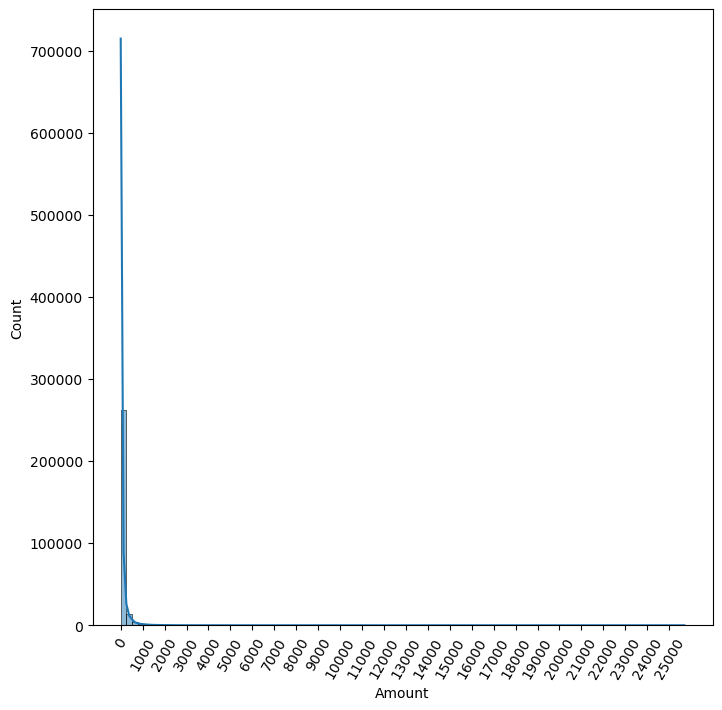

In [111]:
# amount 분포
import seaborn as sns

plt.figure(figsize=(8,8))
plt.xticks(range(0,26000,1000),rotation = 60)# x축의 값
sns.histplot(card_df['Amount'],bins = 100,kde=True)
plt.show()

In [112]:
# amount data 정규분포값으로 변환
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    #df_copy['Amount_Scaled'] = amount_n # 마지막 컬럼으로 추가
    df_copy.insert(0,'Amount_Scaled',amount_n)# 첫번째 컬럼에 추가
    df_copy.drop(['Time','Amount'],axis= 1,inplace = True)
    
    return df_copy

In [113]:
# 데이터 분리
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [114]:
lr_clf = LogisticRegression(max_iter=10000)
get_model_train_test(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test = y_test)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.0298


In [115]:

lgbm_clf = LGBMClassifier(n_estimators=1000
                        , num_leaves= 64,n_jobs=-1 ,boost_from_average = False)
get_model_train_test(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.0221


In [116]:
# 로그변환  = 1p = log + 1
def get_preprocessed_df (df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Saled',amount_n)
    df_copy.drop(['Time','Amount'],axis = 1, inplace =True)
    
    return df_copy

In [117]:
# 데이터 분리
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [118]:
# 이상치를 가지고 있기 때문에 로그로 변환한다.
lgbm_clf = LGBMClassifier(n_estimators=1000
                        , num_leaves= 64,n_jobs=-1 ,boost_from_average = False)
get_model_train_test(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.0204


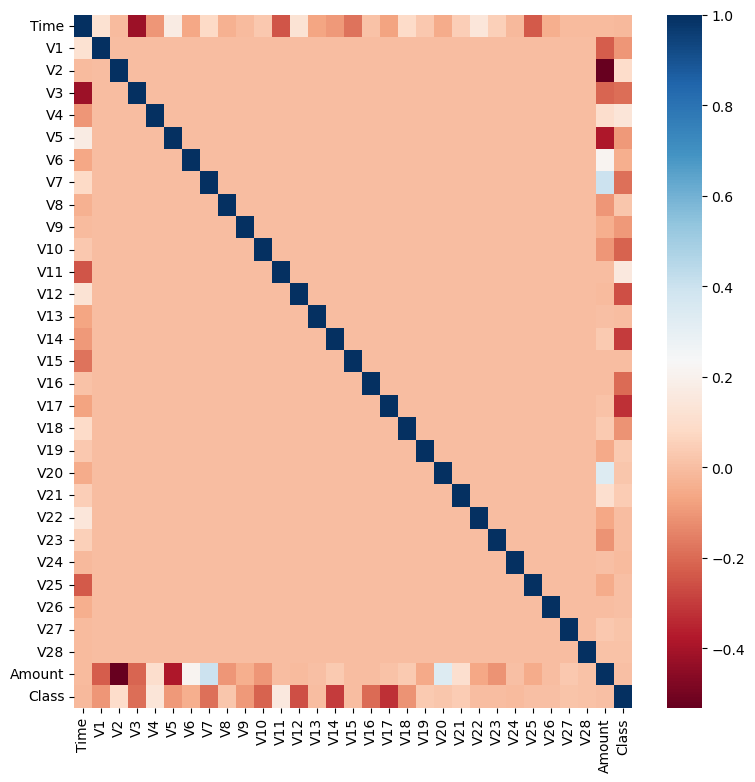

In [119]:
# 이상치 처리
# 어떤 피처를 이상치 검출할것인지 확인 => 상관계수 값을 고려
import seaborn as sns
plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap='RdBu')
plt.show()


In [141]:
# 이상치 찾기 
def get_outlier(df=None,column =None,weight = 1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)# 25%위치에 있는값
    quantile_75 = np.percentile(fraud.values,75)# 75%위치에 있는값
    iqr = quantile_75-quantile_25
    iqr_weight = iqr * weight
    lowest_value = quantile_25-iqr_weight
    highest_value = quantile_75+iqr_weight
    outlier_index = fraud[(fraud<lowest_value)|(fraud>highest_value)].index
    
    return outlier_index

In [138]:
outlier_index = get_outlier(df=card_df,column='V14',weight = 1.5)
outlier_index

Index([8296, 8615, 9035, 9252], dtype='int64')

In [145]:
# 로그변환  = 1p = log + 1
def get_preprocessed_df (df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis = 1, inplace =True)
    
    outlier_index = get_outlier(df = df_copy,column='V14', weight =1.5)
    df_copy.drop(outlier_index,axis = 0,inplace =True)
    
    return df_copy


In [146]:
# 데이터 분리
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)
# 불량률 자

In [147]:
lr_clf = LogisticRegression(max_iter=10000)
get_model_train_test(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test = y_test)

오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.0257


In [148]:
# 이상치를 가지고 있기 때문에 로그로 변환한다.
lgbm_clf = LGBMClassifier(n_estimators=1000
                        , num_leaves= 64,n_jobs=-1 ,boost_from_average = False)
get_model_train_test(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.0220


In [152]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over , y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용전 구조',X_train.shape,y_train.shape)
print('SMOTE 적용후 구조',X_train_over.shape,y_train_over.shape)
print('SMOTE 적용후 구조레입줄 값 분포',pd.Series(y_train_over).value_counts())

SMOTE 적용전 구조 (199362, 29) (199362,)
SMOTE 적용후 구조 (398040, 29) (398040,)
SMOTE 적용후 구조레입줄 값 분포 Class
0    199020
1    199020
Name: count, dtype: int64


In [153]:
lr_clf = LogisticRegression(max_iter=10000)
get_model_train_test(lr_clf,ftr_train=X_train_over,ftr_test=X_test,tgt_train=y_train_over,tgt_test = y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.0263


In [155]:
# 이상치를 가지고 있기 때문에 로그로 변환한다.
lgbm_clf = LGBMClassifier(n_estimators=1000
                        , num_leaves= 64,n_jobs=-1 ,boost_from_average = False)
get_model_train_test(lgbm_clf,ftr_train=X_train_over,ftr_test=X_test,tgt_train=y_train_over,tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.0186


=======================================================================================
### 여기서부터 안보셔도 됩니다.

In [ ]:
fraud = card_df[card_df['Class']==1]['V14']
fraud

541      -4.289254
623      -1.692029
4920     -1.470102
6108     -6.771097
6329     -6.079337
            ...   
279863   -6.665177
280143   -5.210141
280149   -4.057162
281144   -6.416628
281674   -1.948883
Name: V14, Length: 492, dtype: float64

In [ ]:
quantile_25 = np.percentile(fraud.values,25)
quantile_75 = np.percentile(fraud.values,75)
quantile_25,quantile_75 
#iqr 

(-9.692722964972386, -4.282820849486865)

In [ ]:
weight  =1.5
iqr = quantile_75-quantile_25
iqr_weight = iqr*weight
lowest_value = quantile_25 - iqr_weight
print(lowest_value)

-17.807576138200666


In [ ]:
highest_value = quantile_75+iqr_weight
highest_value 

3.8320323237414167

In [ ]:
outlier_index = fraud[(fraud<lowest_value)|(fraud>highest_value)].index
outlier_index

Index([8296, 8615, 9035, 9252], dtype='int64')